# Downloading the dataset

In [114]:
import os
import tarfile
import urllib

In [115]:
url_root="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
path="dataset"
housing_url=url_root+"datasets/housing/housing.tgz"

In [116]:
def fetch_data(url=housing_url,path=path):
    os.makedirs(path,exist_ok=True)
    tgz_path=os.path.join(path,"housing.tgz")
    urllib.request.urlretrieve(url,tgz_path)
    url_tgz=tarfile.open(tgz_path)
    url_tgz.extractall(path=path)
    url_tgz.close()
    

In [117]:
#fetch_data()

# Loading dataset

In [118]:
import pandas as pd
def load_data(file="dataset/housing.csv"):
    data=pd.read_csv(file)
    return data

In [119]:
df=load_data()

In [120]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Analyzing Data

In [121]:
df.info()                                        #this tell how many are null vales as well as dtatatype of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [122]:
df["ocean_proximity"].value_counts()
#since dtype of ocean_proximity is object which means any kind ofpython object it can be, but since it is loaded from csv its a string
#by this we guage that its a catorigical data, to examine catorgrical data how much it has distant value we use value_counts

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [123]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [124]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

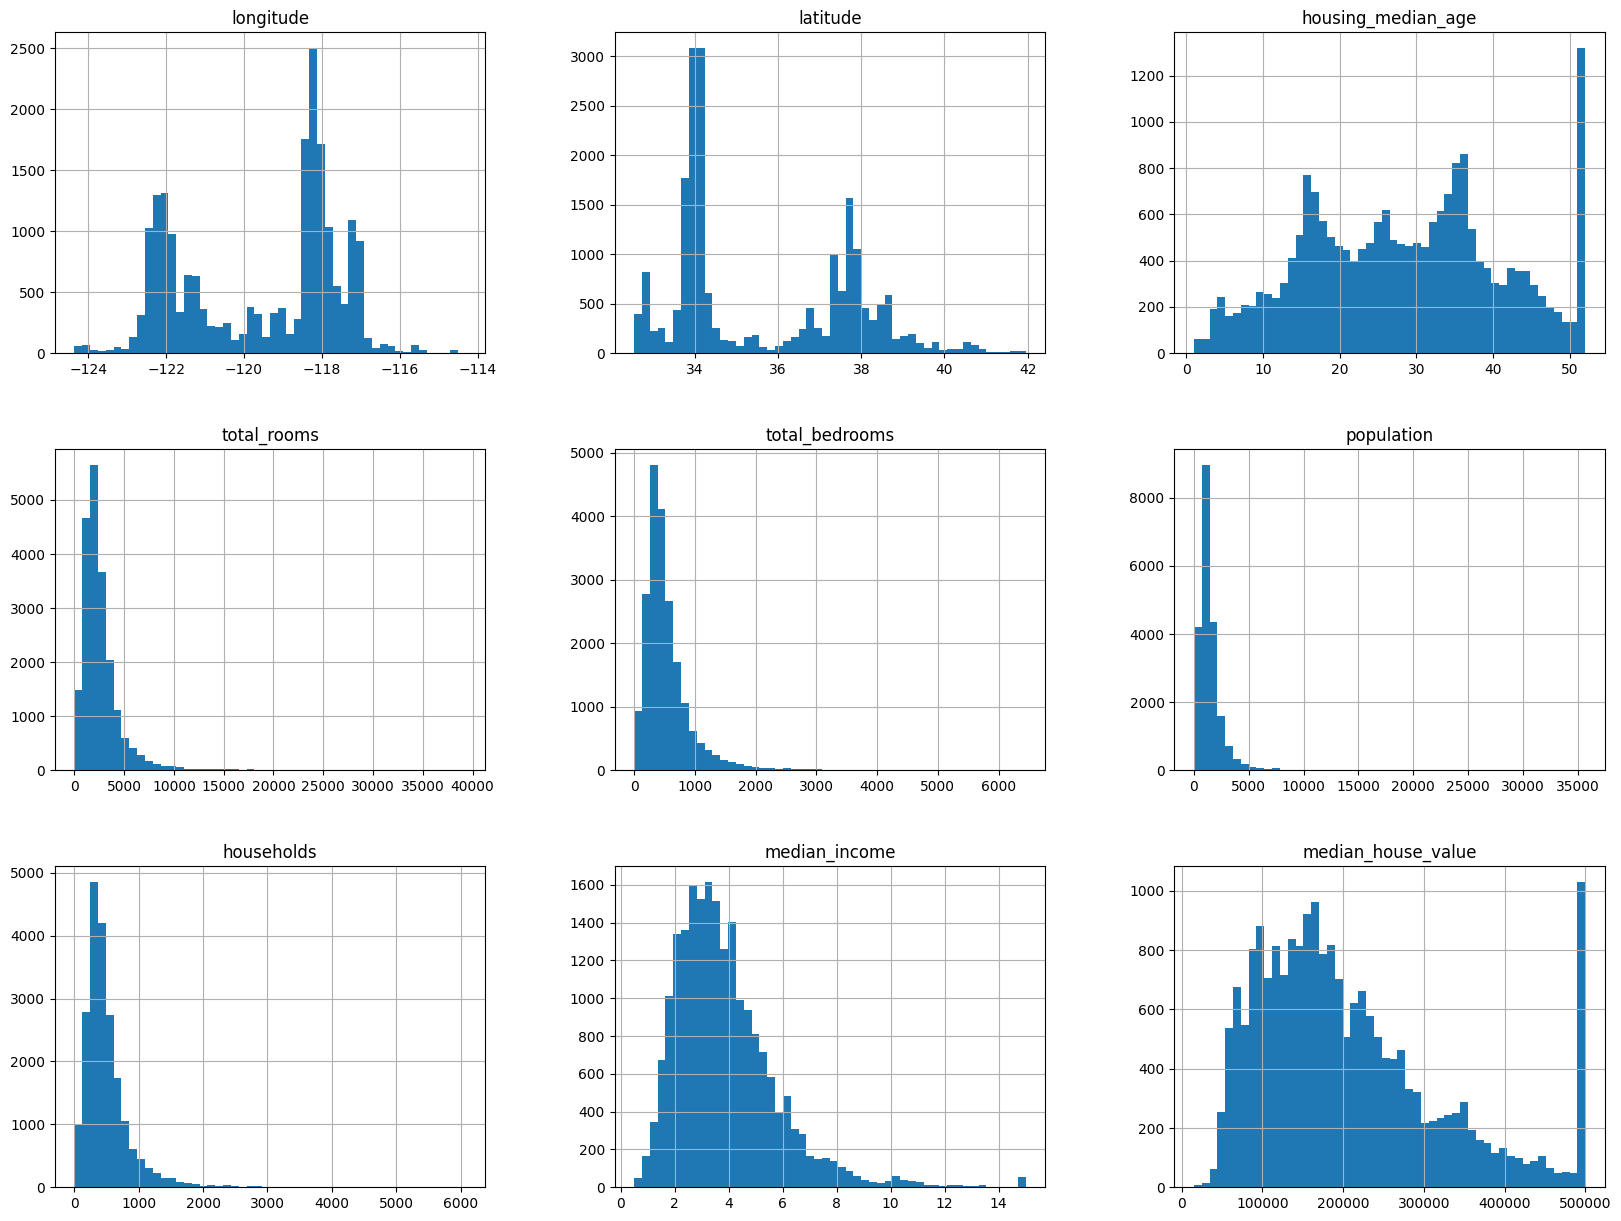

In [125]:
df.hist(bins=50,figsize=(20,15))


# Creating Train and Test Data

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=42)

In [128]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=30)

In [129]:
x_train,x_test,y_train,y_test

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 14196    -117.03     32.71                33.0       3126.0           627.0   
 8267     -118.16     33.77                49.0       3382.0           787.0   
 17445    -120.48     34.66                 4.0       1897.0           331.0   
 14265    -117.11     32.69                36.0       1421.0           367.0   
 2271     -119.80     36.78                43.0       2382.0           431.0   
 ...          ...       ...                 ...          ...             ...   
 11284    -117.96     33.78                35.0       1330.0           201.0   
 11964    -117.43     34.02                33.0       3084.0           570.0   
 5390     -118.38     34.03                36.0       2101.0           569.0   
 860      -121.96     37.58                15.0       3575.0           597.0   
 15795    -122.42     37.77                52.0       4226.0          1315.0   
 
        population  households  median

In [130]:
train_set,test_set

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 7186     -118.18     34.03                39.0        609.0           145.0   
 7686     -118.10     33.93                35.0       1622.0           302.0   
 6332     -117.95     33.99                24.0       1219.0           177.0   
 14192    -117.07     32.69                20.0       2192.0           406.0   
 6611     -118.11     34.18                52.0       3571.0           510.0   
 ...          ...       ...                 ...          ...             ...   
 500      -122.27     37.85                52.0       1974.0           426.0   
 12077    -117.64     33.87                 2.0      17470.0          2727.0   
 15277    -117.34     33.06                17.0       2718.0           518.0   
 4517     -118.20     34.04                44.0       1399.0           386.0   
 5925     -117.80     34.15                14.0       7876.0          1253.0   
 
        population  households  median

# Stratifying Data

In [131]:
import numpy as np

In [132]:
df["income_cat"]=pd.cut(df["median_income"],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [133]:
#This line of code is creating a new column in the DataFrame `df` called "income_cat" based on the values in the "median_income" column. Here's an explanation of what happens:

#1. `pd.cut(df["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])`: This function `pd.cut()` bins the values in the "median_income" column into discrete intervals specified by the `bins` parameter. In this case:
#   - Values from 0 to less than 1.5 are assigned the label 1.
#   - Values from 1.5 to less than 3 are assigned the label 2.
#   - Values from 3 to less than 4.5 are assigned the label 3.
#   - Values from 4.5 to less than 6 are assigned the label 4.
#   - Values greater than or equal to 6 are assigned the label 5.
#   The resulting Series contains categorical codes corresponding to these intervals.

#2. `df["income_cat"] = ...`: This assigns the resulting Series from the `pd.cut()` function to a new column in the DataFrame called "income_cat".

#So, after executing this line of code, the DataFrame `df` will have a new column "income_cat" containing categorical values based on the intervals of the "median_income" column. This can be useful for various purposes such as stratified sampling, grouping, or visualization."""

In [134]:
df["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [135]:
df["income_cat"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: income_cat
Non-Null Count  Dtype   
--------------  -----   
20640 non-null  category
dtypes: category(1)
memory usage: 20.5 KB


<Axes: >

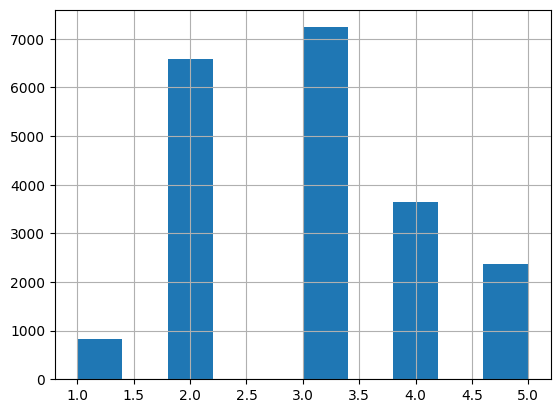

In [136]:
df["income_cat"].hist()

In [137]:
# shuffling based on stratified data

In [138]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df["income_cat"]):
    strat_train=df.loc[train_index]
    strat_test=df.loc[test_index]
    

In [139]:
for set_ in (strat_train,strat_test):
    set_.drop("income_cat",axis=1,inplace=True)

In [140]:
strat_train,strat_test

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 12655    -121.46     38.52                29.0       3873.0           797.0   
 15502    -117.23     33.09                 7.0       5320.0           855.0   
 2908     -119.04     35.37                44.0       1618.0           310.0   
 14053    -117.13     32.75                24.0       1877.0           519.0   
 20496    -118.70     34.28                27.0       3536.0           646.0   
 ...          ...       ...                 ...          ...             ...   
 15174    -117.07     33.03                14.0       6665.0          1231.0   
 12661    -121.42     38.51                15.0       7901.0          1422.0   
 19263    -122.72     38.44                48.0        707.0           166.0   
 19140    -122.70     38.31                14.0       3155.0           580.0   
 19773    -122.14     39.97                27.0       1079.0           222.0   
 
        population  households  median

In [141]:
ylabel=strat_train["median_house_value"]

# Gaining Insights of Data

In [142]:
df=strat_train.copy()

#### Visualizing Geographical Data

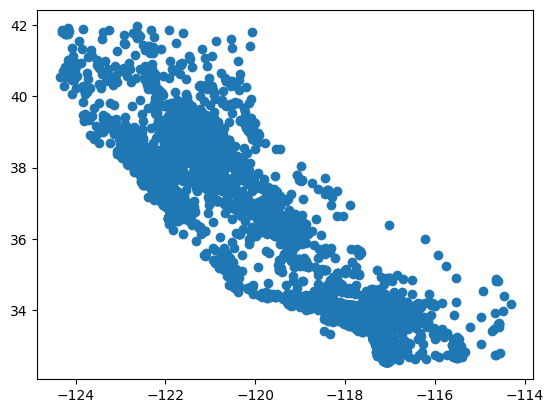

In [143]:
plt.scatter(df["longitude"],df["latitude"])

<Axes: xlabel='longitude', ylabel='latitude'>

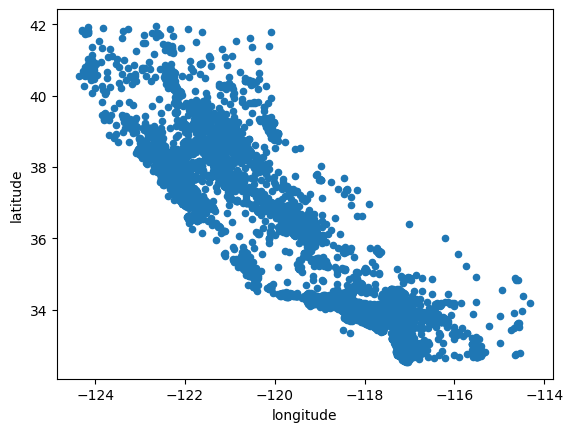

In [144]:
df.plot(x="longitude",y="latitude",kind="scatter")

<Axes: xlabel='longitude', ylabel='latitude'>

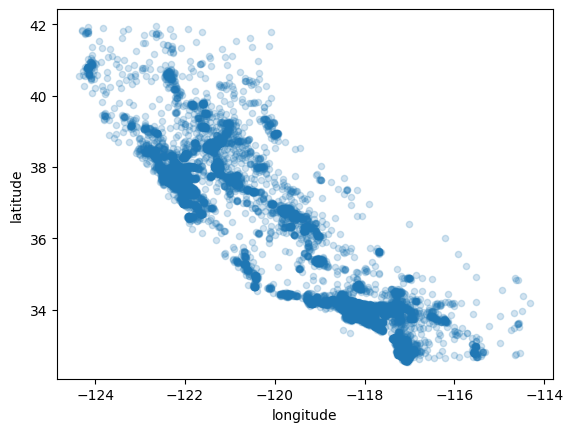

In [145]:
df.plot(x="longitude",y="latitude",kind="scatter",alpha=0.2)

In [146]:
#In the plot() function provided by Pandas, the alpha parameter controls the transparency of the markers in the scatter plot.

#Here's how it works:

#alpha takes a value between 0 and 1, where:
    #0 means fully transparent (invisible),
    #1 means fully opaque (not transparent).
#Values between 0 and 1 create varying levels of transparency, allowing you to see through overlapping markers.
#In the context of your scatter plot:
#alpha=0.4 means that each marker in the scatter plot will be 20% opaque. This can be useful when you have many data points overlapping each other, as it allows you to see the density of points in areas with high data concentration. By adjusting alpha, you can control the visual impact of the markers on the plot.

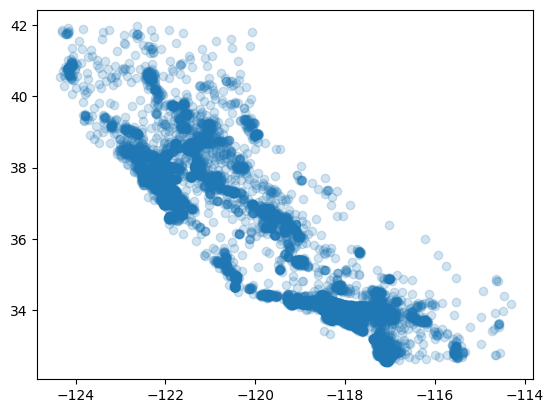

In [147]:
plt.scatter(df["longitude"],df["latitude"],alpha=0.2)

In [148]:
# Radius of each circle represents population option s

<Axes: xlabel='longitude', ylabel='latitude'>

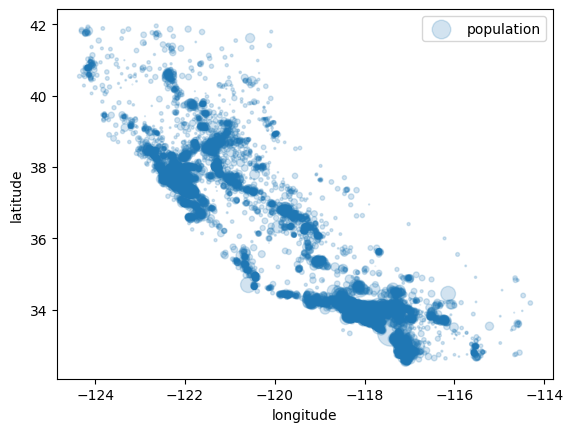

In [149]:
df.plot(x="longitude",y="latitude",kind="scatter",alpha=0.2,s=df["population"]/100, label="population")

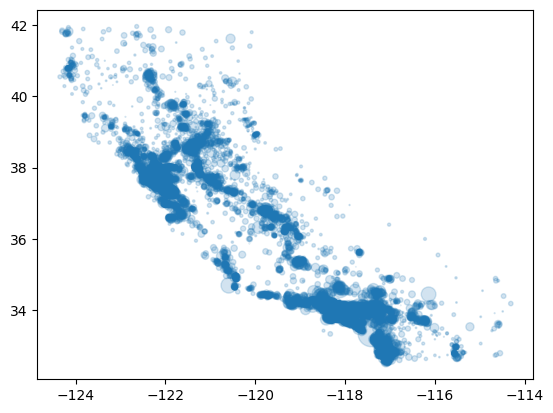

In [150]:
plt.scatter(df["longitude"],df["latitude"],alpha=0.2,s=df["population"]/100, label="population")

In [151]:
# color represents the price option c
# We will use predefined color map called jet option cmap which ranges from blue(low value) to red(high value)

<Axes: xlabel='longitude', ylabel='latitude'>

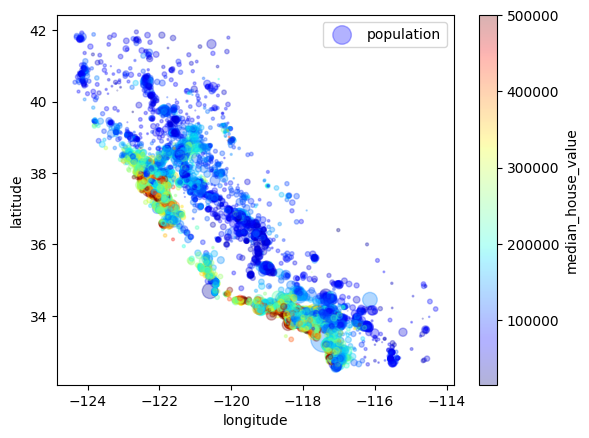

In [152]:
df.plot(x="longitude",y="latitude",kind="scatter",alpha=0.3,s=df["population"]/100, label="population",c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

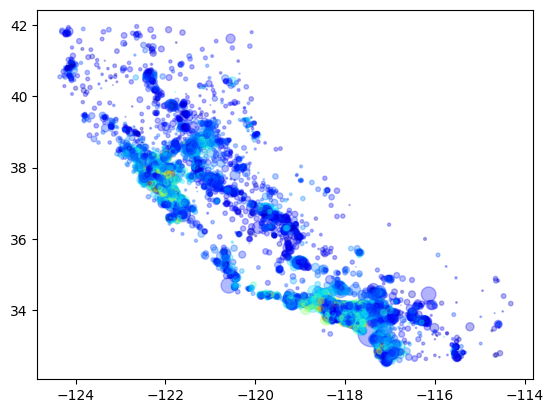

In [153]:
plt.scatter(x=df["longitude"],y=df["latitude"],alpha=0.3,s=df["population"]/100,label="population",c=df["median_income"],cmap=plt.get_cmap("jet"))
#colorbar is not availble parameter in plt.scatter()

#### Looking for Correlations

In [154]:
corr_matrix=df.iloc[:,:-1].corr() #relations between each feature among each other

In [155]:
corr_matrix["median_house_value"].sort_values(ascending=False) # acessing corr value of median_house_value with other feature

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [156]:
#for some attributes like no of room, no of bedrooms, no of population may be insignificant rather that all these attributes on per household

In [157]:
df["total_rooms_per_households"]=df["total_rooms"]/df["households"]
df["total_bedrooms_per_households"]=df["total_bedrooms"]/df["households"]
df["population_per_households"]=df["population"]/df["households"]


In [158]:
tmp=df.copy()
tmp=tmp.drop("ocean_proximity",axis=1)
corr_matrix=tmp.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value               1.000000
median_income                    0.687151
total_rooms_per_households       0.146255
total_rooms                      0.135140
housing_median_age               0.114146
households                       0.064590
total_bedrooms                   0.047781
population_per_households       -0.021991
population                      -0.026882
total_bedrooms_per_households   -0.043349
longitude                       -0.047466
latitude                        -0.142673
Name: median_house_value, dtype: float64

In [159]:
# from the above results attributes_per_households are more correlated than individual attributes

# Data Preprocessing

In [160]:
df=strat_train.copy()

In [161]:
df=df.dropna()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16354 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   median_house_value  16354 non-null  float64
 9   ocean_proximity     16354 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [163]:
df["ocean_proximity"].unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [164]:
df["total_rooms_per_households"]=df["total_rooms"]/df["households"]
df["total_bedrooms_per_households"]=df["total_bedrooms"]/df["households"]
df["population_per_households"]=df["population"]/df["households"]

# Scaling

In [165]:
#to ways to attain scaling is
# 1. min-max (also called normalization)
# 2. standardization 
#formula for minmax (x-min)/(max-min)  it ranges from 0 to 1 [0,1]
#formula for standardization (x-mean)/std(x)

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
cols=df.columns.tolist()
cols.remove("ocean_proximity")
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'total_rooms_per_households',
 'total_bedrooms_per_households',
 'population_per_households']

In [168]:
scale=StandardScaler()
scaled_data=scale.fit_transform(df.drop("ocean_proximity",axis=1))
scaled_df=pd.DataFrame(scaled_data,columns=cols)
scaled_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_households,total_bedrooms_per_households,population_per_households
0,-0.941593,1.347423,0.028467,0.583121,0.635123,0.733056,0.556800,-0.894571,-1.165848,0.016113,0.058962,0.006136
1,1.171676,-1.192227,-1.720236,1.258713,0.775677,0.534096,0.721935,1.291743,0.626342,0.565989,0.028308,-0.040672
2,0.267416,-0.125855,1.220765,-0.469719,-0.545045,-0.674003,-0.524573,-0.526273,-1.074295,-0.019179,-0.128648,-0.075068
3,1.221635,-1.351248,-0.368965,-0.348794,-0.038567,-0.466977,-0.037156,-0.866846,-0.816911,-0.594220,-0.047761,-0.106349
4,0.437277,-0.635656,-0.130506,0.425779,0.269198,0.374570,0.221201,0.325107,0.269632,0.249118,0.029313,0.006024
5,-1.231356,1.085507,-0.051019,-0.661611,-0.685599,-0.622919,-0.652420,-0.094965,-0.357419,-0.249489,-0.194088,-0.019253
6,-1.226360,0.790851,-0.448452,0.745599,0.329782,0.325278,0.383674,1.895071,1.772480,0.435483,-0.102206,-0.027242
7,0.632118,-0.673072,0.584873,-0.435169,-0.658943,-0.574523,-0.583169,0.634962,1.230936,0.245218,-0.300018,-0.025650
8,-1.186393,0.762789,-0.925371,-0.604183,-0.639556,-0.906123,-0.636439,-1.134274,-0.222681,-0.110095,-0.095166,-0.130217
9,0.647105,-0.757259,0.028467,-0.984700,-0.741336,1.139042,-0.745642,-1.773413,2.529959,-1.171416,-0.085523,0.798895


In [169]:
from sklearn.preprocessing import OneHotEncoder

In [170]:
hot=df[["ocean_proximity"]]

In [171]:
model=OneHotEncoder()
cat=model.fit_transform(hot).toarray() 

In [172]:
len(df)==len(scaled_df)

True

# Training Model

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
x_train=scaled_df.drop("median_house_value",axis=1)
y_train=df["median_house_value"]
#x_train,y_train


In [175]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [176]:
test=x_train
test=test.iloc[:5]
model.predict(test)

array([ 92617.30533025, 293562.23896879, 173058.25613695, 178676.83537436,
       242338.63442668])

# Evaluation

In [177]:
df1=strat_test
df1.dropna(inplace=True)
#df1.head()

In [178]:
xtest=df1.drop("ocean_proximity",axis=1)
ytest=df1["median_house_value"]
xtest["total_rooms_per_households"]=xtest["total_rooms"]/xtest["households"]
xtest["total_bedrooms_per_households"]=xtest["total_bedrooms"]/xtest["households"]
xtest["population_per_households"]=xtest["population"]/xtest["households"]
xtest=xtest.drop("median_house_value",axis=1)
ytest=df1["median_house_value"]
xtest.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_rooms_per_households,total_bedrooms_per_households,population_per_households
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,6.715625,1.054167,2.275000
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,7.137809,1.084806,3.021201
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,5.283636,0.981818,2.938182
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,5.491694,1.079734,3.561462
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,6.154723,1.000000,2.434853


In [179]:
scale=StandardScaler()
cols=xtest.columns.tolist()
scaled_xtest=scale.fit_transform(xtest)
scaled_xtest_df=pd.DataFrame(scaled_xtest,columns=cols)
xtest=scaled_xtest_df

In [180]:
predicted=model.predict(xtest)

In [181]:
from sklearn.metrics import mean_squared_error
err=mean_squared_error(predicted,ytest)
err

4631185033.515076

In [182]:
predicted,ytest

(array([417813.32244292, 299525.90625018, 238286.61947058, ...,
        320355.54789394, 265871.22515558, 232684.19595491]),
 5241     500001.0
 17352    162500.0
 3505     204600.0
 7777     159700.0
 14155    184000.0
            ...   
 12182    110000.0
 7275     118800.0
 17223    293800.0
 10786    335700.0
 3965     215600.0
 Name: median_house_value, Length: 4079, dtype: float64)

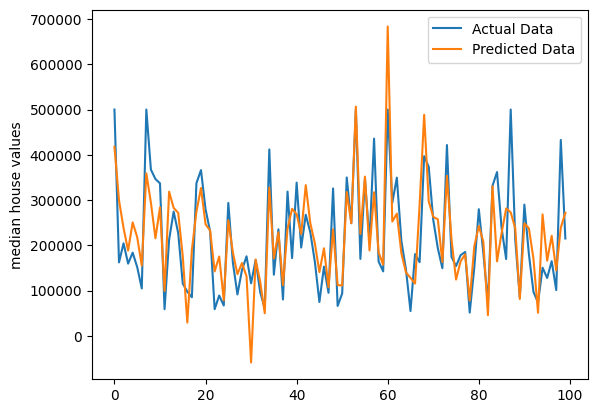

In [183]:
l=[i for i in range(100)]
#plt.scatter(l,ytest[:100],label="Actual Data")
#plt.scatter(l,predicted[:100],label="Predicted Data")
plt.plot(l,ytest[:100],label="Actual Data")
plt.plot(l,predicted[:100],label="Predicted Data")
plt.ylabel("median house values")
plt.legend()
